<a href="https://colab.research.google.com/github/ejrtks1020/Deep_Learning/blob/main/fashion_mnist_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


### Keras fashion mnist dataset을 다운로드
* 5만개의 학습용, 1만개의 테스트용 grayscale image array를 다운로드

In [2]:
from tensorflow.keras.datasets import fashion_mnist

# 전체 6만개 데이터 중, 5만개는 학습 데이터용, 1만개는 테스트 데이터용으로 분리
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
# image size는 28x28의 grayscale 2차원 데이터
print("train dataset shape:", train_images.shape, train_labels.shape)
print("test dataset shape:", test_images.shape, test_labels.shape)

4431872/4422102 [==============================] - 0s 0us/step
train dataset shape: (60000, 28, 28) (60000,)
test dataset shape: (10000, 28, 28) (10000,)


### MNIST image array 시각화

Text(0.5, 1.0, '9')

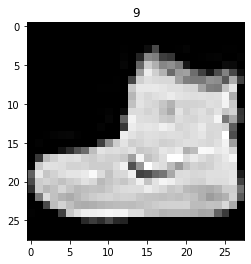

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(train_images[0], cmap='gray')
plt.title(train_labels[0])

In [4]:
train_images[0, :, :], train_labels[0]

(array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
           0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
           1,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
           0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
           0,   3],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
           0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
          10

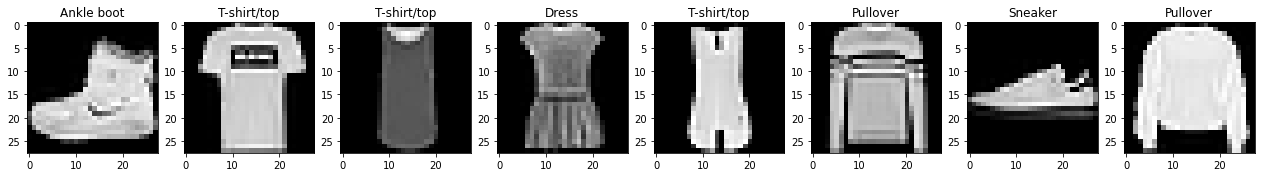

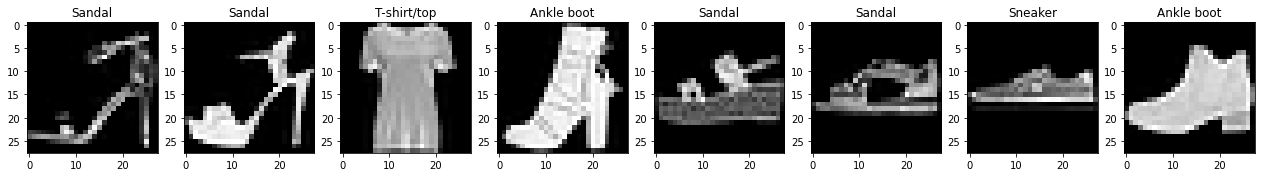

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline 

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

def show_images(images, labels, ncols=8):
    figure, axs = plt.subplots(figsize=(22, 6), nrows=1, ncols=ncols)
    for i in range(ncols):
        axs[i].imshow(images[i], cmap='gray')
        axs[i].set_title(class_names[labels[i]])
        
show_images(train_images[:8], train_labels[:8], ncols=8)
show_images(train_images[8:16], train_labels[8:16], ncols=8)

### 데이터 전처리 수행. 
* 0 ~ 255 사이의 픽셀값을 0 ~ 1 사이 값으로 변환. 
* array type은 float 32

In [6]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

def get_preprocessed_data(images, labels):
    
    # 학습과 테스트 이미지 array를 0~1 사이값으로 scale 및 float32 형 변형. 
    images = np.array(images/255.0, dtype=np.float32)
    labels = np.array(labels, dtype=np.float32)
    
    return images, labels

train_images, train_labels = get_preprocessed_data(train_images, train_labels)
test_images, test_labels = get_preprocessed_data(test_images, test_labels)

print("train dataset shape:", train_images.shape, train_labels.shape)
print("test dataset shape:", test_images.shape, test_labels.shape)


train dataset shape: (60000, 28, 28) (60000,)
test dataset shape: (10000, 28, 28) (10000,)


In [ ]:
train_images[0]

### Dense Layer를 기반으로 모델을 생성

In [8]:
INPUT_SIZE = 28

In [9]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential

model = Sequential([
    Flatten(input_shape=(INPUT_SIZE, INPUT_SIZE)),
    Dense(100, activation='relu'),
    Dense(30, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 30)                3030      
                                                                 
 dense_2 (Dense)             (None, 10)                310       
                                                                 
Total params: 81,840
Trainable params: 81,840
Non-trainable params: 0
_________________________________________________________________


### 모델의 Loss와 Optimizer 설정하고 학습 수행
* loss는 categorical_crossentropy로, optimizer는 Adam으로 설정
* categorical crossentropy를 위해서 Lable을 OHE(One Hot Encoding) 로 변경
* OHE를 사용하지 않을거라면 Sparse Cartegorical Crossentropy 사용

In [10]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy

model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
from tensorflow.keras.utils import to_categorical

train_oh_labels = to_categorical(train_labels)
test_oh_labels = to_categorical(test_labels)

print(train_oh_labels.shape, test_oh_labels.shape)

(60000, 10) (10000, 10)


In [12]:
train_images.shape

(60000, 28, 28)

In [13]:
history = model.fit(x=train_images, y=train_oh_labels, batch_size=32, epochs=20, verbose=1)

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5213 - accuracy: 0.8164
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3781 - accuracy: 0.8618
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3424 - accuracy: 0.8752
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3216 - accuracy: 0.8815
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3017 - accuracy: 0.8878
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2884 - accuracy: 0.8935
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2774 - accuracy: 0.8973
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2657 - accuracy: 0.9005
Epoch 9/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2569 - accuracy: 0.9031
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.249

In [14]:
print(history.history['loss'])
print(history.history['accuracy'])


[0.5213015079498291, 0.3781217634677887, 0.342426061630249, 0.32155078649520874, 0.3016594648361206, 0.2884361445903778, 0.2774319350719452, 0.26566842198371887, 0.2569391131401062, 0.24946609139442444, 0.24063566327095032, 0.23591363430023193, 0.2272687554359436, 0.2218334972858429, 0.21625863015651703, 0.21260319650173187, 0.20440302789211273, 0.20271609723567963, 0.19538214802742004, 0.19263488054275513]
[0.8164166808128357, 0.8618333339691162, 0.8751500248908997, 0.8815000057220459, 0.8878166675567627, 0.8935166597366333, 0.8973000049591064, 0.9005333185195923, 0.9031000137329102, 0.9058833122253418, 0.9097333550453186, 0.9110000133514404, 0.9139999747276306, 0.9153333306312561, 0.9189666509628296, 0.9190666675567627, 0.9221500158309937, 0.9240166544914246, 0.9266833066940308, 0.9269499778747559]


### 테스트 데이터를 기반으로 Label 값 예측
* model.predict()를 이용하여 label값 예측
* predict()의 인자로 입력되는 feature array는 학습의 feature array와 shape가 동일해야함. 
* fit() 시 3차원(28x28 2차원 array가 여러개 존재) array 입력 했으므로 predict()도 동일한 3차원 데이터 입력
* 특히 한건만 predict() 할때도 3차원 데이터여야 함. 이를 위해 expand_dims()로 2차원 image 배열을 3차원으로 변경

In [18]:
test_images.shape

(10000, 28, 28)

In [19]:
pred_proba = model.predict(test_images)
print(pred_proba.shape)

(10000, 10)


In [20]:
np.expand_dims(test_images[0], axis=0).shape

(1, 28, 28)

In [21]:
# 모델의 input shape는 2차원, 학습은 3차원(배치포함), 따라서 테스트도 3차원으로 진행해야함
pred_proba = model.predict(np.expand_dims(test_images[0], axis=0))
print('softmax output:', pred_proba)
pred = np.argmax(np.squeeze(pred_proba))
print('predicted class value:', pred)


softmax output: [[1.2007147e-08 4.6006216e-13 4.7665869e-12 4.1993378e-09 4.2375816e-12
  3.2962082e-05 2.7953886e-09 2.1479102e-03 6.7466623e-09 9.9781907e-01]]
predicted class value: 9


In [22]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print('target class value:', test_labels[0], 'predicted class value:', pred)

target class value: 9.0 predicted class value: 9


### 테스트 데이터 세트로 모델 성능 검증

In [23]:
model.evaluate(test_images, test_oh_labels, batch_size=64)

157/157 [==============================] - 0s 2ms/step - loss: 0.3790 - accuracy: 0.8783


[0.37896278500556946, 0.8783000111579895]

### 검증 데이터 세트를 이용하여 학습 수행. 
* 일반적으로 fit() 수행시 별도의 검증 데이터 세트를 이용하여 학습 시 과적합(Overfitting)이 발생하는지 모니터링
* fit()을 수행하면 iteration을 반복하기 때문에 중간에 하이퍼파라미터 변경(예: Learning Rate)등의 작업이 어려움. 
* fit() iteration시 여러 작업을 하기 위해 Callback 객체를 가짐. 
* 검증 데이터 세트를 fit() 시 적용하여 과적합이나 더이상 검증 데이터 성능이 좋아 지지 않을 때 Callback을 사용하여 Learning Rate 보정 작업등을 수행 가능

In [24]:
import numpy as np 
import pandas as pd
from tensorflow.keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

def get_preprocessed_data(images, labels):
    
    # 학습과 테스트 이미지 array를 0~1 사이값으로 scale 및 float32 형 변형. 
    images = np.array(images/255.0, dtype=np.float32)
    labels = np.array(labels, dtype=np.float32)
    
    return images, labels

train_images, train_labels = get_preprocessed_data(train_images, train_labels)
test_images, test_labels = get_preprocessed_data(test_images, test_labels)

In [25]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# 기존 학습 데이터를 다시 학습과 검증 데이터 세트로 분리
tr_images, val_images, tr_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.15, random_state=2021)
print('train과 validation shape:', tr_images.shape, tr_labels.shape, val_images.shape, val_labels.shape)

# OHE 적용
tr_oh_labels = to_categorical(tr_labels)
val_oh_labels = to_categorical(val_labels)

print('after OHE:', tr_oh_labels.shape, val_oh_labels.shape)

train과 validation shape: (51000, 28, 28) (51000,) (9000, 28, 28) (9000,)
after OHE: (51000, 10) (9000, 10)


### 검증 데이터 세트를 적용하여 학습 수행. 

In [26]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

INPUT_SIZE = 28
model = Sequential([
    Flatten(input_shape=(INPUT_SIZE, INPUT_SIZE)),
    Dense(100, activation='relu'),
    Dense(30, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [27]:
history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=128, validation_data=(val_images, val_oh_labels), 
                    epochs=20, verbose=1)

Epoch 1/20
399/399 [==============================] - 2s 4ms/step - loss: 0.5909 - accuracy: 0.7967 - val_loss: 0.4591 - val_accuracy: 0.8384
Epoch 2/20
399/399 [==============================] - 1s 4ms/step - loss: 0.4086 - accuracy: 0.8567 - val_loss: 0.4131 - val_accuracy: 0.8479
Epoch 3/20
399/399 [==============================] - 1s 4ms/step - loss: 0.3691 - accuracy: 0.8690 - val_loss: 0.3720 - val_accuracy: 0.8652
Epoch 4/20
399/399 [==============================] - 1s 4ms/step - loss: 0.3421 - accuracy: 0.8765 - val_loss: 0.3843 - val_accuracy: 0.8612
Epoch 5/20
399/399 [==============================] - 1s 3ms/step - loss: 0.3242 - accuracy: 0.8819 - val_loss: 0.3696 - val_accuracy: 0.8674
Epoch 6/20
399/399 [==============================] - 1s 3ms/step - loss: 0.3072 - accuracy: 0.8875 - val_loss: 0.3358 - val_accuracy: 0.8793
Epoch 7/20
399/399 [==============================] - 1s 4ms/step - loss: 0.2952 - accuracy: 0.8924 - val_loss: 0.3444 - val_accuracy: 0.8734
Epoch 

In [28]:
print(history.history['loss'])
print(history.history['accuracy'])
print(history.history['val_loss'])
print(history.history['val_accuracy'])

[0.5908641219139099, 0.4086112082004547, 0.3690655529499054, 0.3420960605144501, 0.3242325782775879, 0.30721357464790344, 0.2951543927192688, 0.2822238504886627, 0.27354177832603455, 0.2664751410484314, 0.25673434138298035, 0.25104716420173645, 0.2380281537771225, 0.2340305596590042, 0.22902794182300568, 0.22334881126880646, 0.2195347547531128, 0.21262964606285095, 0.20732919871807098, 0.2005188763141632]
[0.7967451214790344, 0.856705904006958, 0.8690392374992371, 0.8765293955802917, 0.88188236951828, 0.887509822845459, 0.8924117684364319, 0.8971960544586182, 0.8994901776313782, 0.9020392298698425, 0.9047843217849731, 0.9073333144187927, 0.9132353067398071, 0.9130980372428894, 0.9152156710624695, 0.9186862707138062, 0.9186078310012817, 0.9209803938865662, 0.9230391979217529, 0.9265490174293518]
[0.45909130573272705, 0.41310685873031616, 0.3720285892486572, 0.3843359351158142, 0.36959248781204224, 0.3358219265937805, 0.3444114327430725, 0.33022597432136536, 0.3263908326625824, 0.3133162

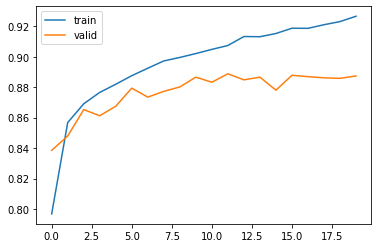

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='valid')
plt.legend()

### Functional API

In [30]:
# Sequential Model을 이용하여 Keras 모델 생성 
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential

INPUT_SIZE = 28

model = Sequential([
    Flatten(input_shape=(INPUT_SIZE, INPUT_SIZE)),
    Dense(100, activation='relu'),
    Dense(30, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()

model1 = Sequential()
model1.add(Flatten(input_shape=(INPUT_SIZE, INPUT_SIZE)))
model1.add(Dense(100, activation='relu'))
model1.add(Dense(30, activation='relu'))
model1.add(Dense(10, activation='softmax'))

model1.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 100)               78500     
                                                                 
 dense_7 (Dense)             (None, 30)                3030      
                                                                 
 dense_8 (Dense)             (None, 10)                310       
                                                                 
Total params: 81,840
Trainable params: 81,840
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)        

In [31]:
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.models import Model

input_tensor = Input(shape=(INPUT_SIZE, INPUT_SIZE))
x = Flatten()(input_tensor)
x = Dense(100, activation='relu')(x)
x = Dense(30, activation='relu')(x)
output = Dense(10, activation='softmax')(x)

model = Model(inputs=input_tensor, outputs=output)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 100)               78500     
                                                                 
 dense_13 (Dense)            (None, 30)                3030      
                                                                 
 dense_14 (Dense)            (None, 10)                310       
                                                                 
Total params: 81,840
Trainable params: 81,840
Non-trainable params: 0
_________________________________________________________________


### Custom한 Dense Layer 생성하기

In [33]:
from tensorflow.keras.layers import Layer, Input
from tensorflow.keras.models import Model
import tensorflow as tf

class CustomDense(tf.keras.layers.Layer):
    # CustomDense 객체 생성시 입력되는 초기화 parameter 처리
    def __init__(self, units=32):
        super(CustomDense, self).__init__()
        self.units = units

    def build(self, input_shape):
        self.w = self.add_weight(
            shape=(input_shape[-1], self.units),
            initializer="random_normal",
            trainable=True,
        )
        self.b = self.add_weight(
            shape=(self.units,), initializer="random_normal", trainable=True
        )
        
    # CustomDense 객체에 callable로 입력된 입력 데이터 처리. 
    def call(self, inputs):
        return tf.matmul(inputs, self.w) + self.b

# input 값을 4개의 원소를 가지는 1차원으로 생성. 
inputs = Input((4,))
# 10개의 unit을 가지는 CustomDense 객체를 생성 후 callable로 inputs값 입력 
outputs = CustomDense(10)(inputs)

# inputs와 outputs로 model 생성. 
model = Model(inputs, outputs)
model.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 4)]               0         
                                                                 
 custom_dense (CustomDense)  (None, 10)                50        
                                                                 
Total params: 50
Trainable params: 50
Non-trainable params: 0
_________________________________________________________________


### Functional API는 객체 생성 부분과 Callable 인자 입력 부분을 별도로 수행해도 무방. 

In [34]:
inputs = Input((4,))
# 10개의 unit을 가지는 CustomDense 객체를 생성 후 callable로 inputs값 입력 
my_layer = CustomDense(10)
outputs = my_layer(inputs)

# inputs와 outputs로 model 생성. 
model = Model(inputs, outputs)
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 4)]               0         
                                                                 
 custom_dense_1 (CustomDense  (None, 10)               50        
 )                                                               
                                                                 
Total params: 50
Trainable params: 50
Non-trainable params: 0
_________________________________________________________________


### Sequential Model 생성은 단지 Functional API Layer들을 iteration 하면서 연결한 것을 model로 만든 것임

In [35]:
from tensorflow.keras.models import Sequential

model = Sequential([Input((4,)),
                   CustomDense(10),
                   CustomDense(8), 
                   tf.keras.layers.ReLU()])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 custom_dense_2 (CustomDense  (None, 10)               50        
 )                                                               
                                                                 
 custom_dense_3 (CustomDense  (None, 8)                88        
 )                                                               
                                                                 
 re_lu (ReLU)                (None, 8)                 0         
                                                                 
Total params: 138
Trainable params: 138
Non-trainable params: 0
_________________________________________________________________


### Sequential Model을 Functional 객체를 For loop 반복 호출하여 작성.

In [36]:
layers_list = [Input((4,)), CustomDense(10), CustomDense(8), tf.keras.layers.ReLU()]

for index, layer in enumerate(layers_list):
        print(index, layer)

0 KerasTensor(type_spec=TensorSpec(shape=(None, 4), dtype=tf.float32, name='input_6'), name='input_6', description="created by layer 'input_6'")
1 <__main__.CustomDense object at 0x7f0ac281f810>
2 <__main__.CustomDense object at 0x7f0ac2898790>
3 <keras.layers.advanced_activations.ReLU object at 0x7f0ac2898e50>


In [37]:
layers_list = [Input((4,)), CustomDense(10), CustomDense(8), tf.keras.layers.ReLU()]

inputs = None
callable_inputs = None
outputs = None
# layers_list에 있는 Functional 객체를 iteration 수행하면서 적용. 
for index, layer in enumerate(layers_list):
    # layers_list의 첫번째 인자는 Input 간주. 
    if index == 0:
        inputs = layer
        callable_inputs = layer
    # Functional 객체에 callable 인자로 callable_inputs를 입력하고 반환 결과 값을 다시 callable_inputs로 할당.     
    else: 
        callable_inputs = layer(callable_inputs)
    
outputs = callable_inputs
model = Model(inputs, outputs)
model.summary()


Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 4)]               0         
                                                                 
 custom_dense_6 (CustomDense  (None, 10)               50        
 )                                                               
                                                                 
 custom_dense_7 (CustomDense  (None, 8)                88        
 )                                                               
                                                                 
 re_lu_2 (ReLU)              (None, 8)                 0         
                                                                 
Total params: 138
Trainable params: 138
Non-trainable params: 0
_________________________________________________________________


### 앞에서 생성한 로직들을 함수화 
* Functional API로 모델 만들기
* pixel값 1 ~ 255를 0 ~ 1사이값 Float 32로 만들기
* One Hot Encoding Label에 적용하기
* 학습과 검증 데이터로 나누기.
* compile, 학습/예측/평가

In [3]:
from tensorflow.keras.layers import Layer, Input, Dense, Flatten
from tensorflow.keras.models import Model
import tensorflow as tf

INPUT_SIZE = 28
def create_model():
  #처음 모델 설계는 사이즈만, 배치는 나중에 케라스 프레임워크가
  input_tensor = Input(shape = (INPUT_SIZE, INPUT_SIZE))
  x = Flatten()(input_tensor)
  x = Dense(100, activation = 'relu')(x)
  x = Dense(30 , activation = 'relu')(x)
  output = Dense(10, activation = 'softmax')(x)

  model = Model(inputs = input_tensor, outputs = output)
  return model

model = create_model()
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 100)               78500     
                                                                 
 dense_4 (Dense)             (None, 30)                3030      
                                                                 
 dense_5 (Dense)             (None, 10)                310       
                                                                 
Total params: 81,840
Trainable params: 81,840
Non-trainable params: 0
_________________________________________________________________


In [5]:
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# 0 ~ 1사이값의 float32로 변경하는 함수
def get_preprocessed_data(images, labels):
    
    # 학습과 테스트 이미지 array를 0~1 사이값으로 scale 및 float32 형 변형. 
    images = np.array(images/255.0, dtype=np.float32)
    labels = np.array(labels, dtype=np.float32)
    
    return images, labels

# 0 ~ 1사이값 float32로 변경하는 함수 호출 한 뒤 OHE 적용 
def get_preprocessed_ohe(images, labels):
    images, labels = get_preprocessed_data(images, labels)
    # OHE 적용 
    oh_labels = to_categorical(labels)
    return images, oh_labels

# 학습/검증/테스트 데이터 세트에 전처리 및 OHE 적용한 뒤 반환 
def get_train_valid_test_set(train_images, train_labels, test_images, test_labels, valid_size=0.15, random_state=2021):
    # 학습 및 테스트 데이터 세트를  0 ~ 1사이값 float32로 변경 및 OHE 적용. 
    train_images, train_oh_labels = get_preprocessed_ohe(train_images, train_labels)
    test_images, test_oh_labels = get_preprocessed_ohe(test_images, test_labels)
    
    # 학습 데이터를 검증 데이터 세트로 다시 분리
    tr_images, val_images, tr_oh_labels, val_oh_labels = train_test_split(train_images, train_oh_labels, test_size=valid_size, random_state=random_state)
    
    return (tr_images, tr_oh_labels), (val_images, val_oh_labels), (test_images, test_oh_labels ) 


In [9]:
from tensorflow.keras.datasets import fashion_mnist
# Fashion MNIST 데이터 재 로딩 및 전처리 적용하여 학습/검증/데이터 세트 생성. 

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)
(tr_images, tr_oh_labels), (val_images, val_oh_labels), (test_images, test_oh_labels) = \
    get_train_valid_test_set(train_images, train_labels, test_images, test_labels, valid_size=0.15, random_state=2021)
print(tr_images.shape, tr_oh_labels.shape, val_images.shape, val_oh_labels.shape, test_images.shape, test_labels.shape)


(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
(51000, 28, 28) (51000, 10) (9000, 28, 28) (9000, 10) (10000, 28, 28) (10000,)


In [10]:
from tensorflow.keras.optimizers import Adam

# Model 생성 및 optimizer, loss, metric 적용
model = create_model()
model.summary()

model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 100)               78500     
                                                                 
 dense_7 (Dense)             (None, 30)                3030      
                                                                 
 dense_8 (Dense)             (None, 10)                310       
                                                                 
Total params: 81,840
Trainable params: 81,840
Non-trainable params: 0
_________________________________________________________________


In [11]:
# 학습 수행. 
history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=128, epochs=20, validation_data=(val_images, val_oh_labels))


Epoch 1/20
399/399 [==============================] - 9s 19ms/step - loss: 0.6022 - accuracy: 0.7915 - val_loss: 0.4507 - val_accuracy: 0.8434
Epoch 2/20
399/399 [==============================] - 6s 14ms/step - loss: 0.4193 - accuracy: 0.8528 - val_loss: 0.4007 - val_accuracy: 0.8598
Epoch 3/20
399/399 [==============================] - 6s 16ms/step - loss: 0.3686 - accuracy: 0.8698 - val_loss: 0.3924 - val_accuracy: 0.8599
Epoch 4/20
399/399 [==============================] - 6s 15ms/step - loss: 0.3441 - accuracy: 0.8767 - val_loss: 0.3658 - val_accuracy: 0.8673
Epoch 5/20
399/399 [==============================] - 6s 14ms/step - loss: 0.3237 - accuracy: 0.8830 - val_loss: 0.3611 - val_accuracy: 0.8681
Epoch 6/20
399/399 [==============================] - 4s 9ms/step - loss: 0.3084 - accuracy: 0.8875 - val_loss: 0.3446 - val_accuracy: 0.8719
Epoch 7/20
399/399 [==============================] - 3s 9ms/step - loss: 0.3004 - accuracy: 0.8910 - val_loss: 0.3354 - val_accuracy: 0.8772
E

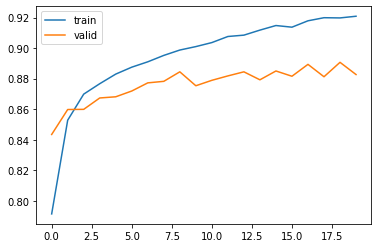

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

def show_history(history):
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='valid')
    plt.legend()
    
show_history(history)

In [13]:
# 테스트 데이터 세트로 모델 성능 검증
model.evaluate(test_images, test_oh_labels, batch_size=256, verbose=1)


40/40 [==============================] - 0s 5ms/step - loss: 0.3590 - accuracy: 0.8796


[0.35904598236083984, 0.8795999884605408]

### Callback 

#### ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', period=1)
* 특정 조건에 맞춰서 모델을 파일로 저장
* filepath: filepath는 (on_epoch_end에서 전달되는) epoch의 값과 logs의 키로 채워진 이름 형식 옵션을 가질 수 있음.
예를 들어 filepath가 weights.{epoch:02d}-{val_loss:.2f}.hdf5라면, 파일 이름에 세대 번호와 검증 손실을 넣어 모델의 체크포인트가 저장 
* monitor: 모니터할 지표(loss 또는 평가 지표) 
* save_best_only: 가장 좋은 성능을 나타내는 모델만 저장할 여부
* save_weights_only: Weights만 저장할 지 여부 
* mode: {auto, min, max} 중 하나. monitor 지표가 감소해야 좋을 경우 min, 증가해야 좋을 경우 max, auto는 monitor 이름에서 자동으로 유추. 

In [14]:
!pwd

/content


In [15]:
from tensorflow.keras.callbacks import ModelCheckpoint

model = create_model()
model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

mcp_cb = ModelCheckpoint(filepath='/content/model/weights.{epoch:02d}-{val_loss:.2f}.hdf5', monitor='val_loss', 
                         save_best_only=True, save_weights_only=True, mode='min', period=3, verbose=1)
history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=128, epochs=10, validation_data=(val_images, val_oh_labels),
                   callbacks=[mcp_cb])

Epoch 1/10
399/399 [==============================] - 4s 8ms/step - loss: 0.5899 - accuracy: 0.7995 - val_loss: 0.4656 - val_accuracy: 0.8302
Epoch 2/10
399/399 [==============================] - 2s 6ms/step - loss: 0.4171 - accuracy: 0.8541 - val_loss: 0.4111 - val_accuracy: 0.8537
Epoch 3/10
398/399 [============================>.] - ETA: 0s - loss: 0.3790 - accuracy: 0.8659
Epoch 00003: val_loss improved from inf to 0.39344, saving model to /content/model/weights.03-0.39.hdf5
399/399 [==============================] - 3s 7ms/step - loss: 0.3789 - accuracy: 0.8660 - val_loss: 0.3934 - val_accuracy: 0.8530
Epoch 4/10
399/399 [==============================] - 3s 7ms/step - loss: 0.3533 - accuracy: 0.8749 - val_loss: 0.3776 - val_accuracy: 0.8652
Epoch 5/10
399/399 [==============================] - 3s 7ms/step - loss: 0.3340 - accuracy: 0.8796 - val_loss: 0.3564 - val_accuracy: 0.8716
Epoch 6/10
393/399 [============================>.] - ETA: 0s - loss: 0.3170 - accuracy: 0.8845
Epoch

In [16]:
!ls -lia
#!rm -rf weight*
#!ls -lia


total 24
4194327 drwxr-xr-x 1 root root 4096 Jan  2 16:49 .
3408103 drwxr-xr-x 1 root root 4096 Jan  2 16:14 ..
4849680 drwxr-xr-x 4 root root 4096 Dec  3 14:33 .config
3407891 drwxr-xr-x 2 root root 4096 Jan  2 16:49 .ipynb_checkpoints
3407890 drwxr-xr-x 2 root root 4096 Jan  2 16:50 model
4194328 drwxr-xr-x 1 root root 4096 Dec  3 14:33 sample_data


#### ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, verbose=0, mode='auto', min_delta=0.0001, cooldown=0, min_lr=0)
* 특정 epochs 횟수동안 성능이 개선 되지 않을 시 Learning rate를 동적으로 감소 시킴 
* monitor: 모니터할 지표(loss 또는 평가 지표) 
* factor: 학습 속도를 줄일 인수. new_lr = lr * factor 
* patience: Learing Rate를 줄이기 전에 monitor할 epochs 횟수. 
* mode: {auto, min, max} 중 하나. monitor 지표가 감소해야 좋을 경우 min, 증가해야 좋을 경우 max, auto는 monitor 이름에서 유추. 

In [17]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

model = create_model()
model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

rlr_cb = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=3, mode='min', verbose=1)
history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=128, epochs=30, validation_data=(val_images, val_oh_labels),
                   callbacks=[rlr_cb])

Epoch 1/30
399/399 [==============================] - 3s 7ms/step - loss: 0.6030 - accuracy: 0.7899 - val_loss: 0.4605 - val_accuracy: 0.8353 - lr: 0.0010
Epoch 2/30
399/399 [==============================] - 2s 6ms/step - loss: 0.4076 - accuracy: 0.8559 - val_loss: 0.4181 - val_accuracy: 0.8511 - lr: 0.0010
Epoch 3/30
399/399 [==============================] - 2s 6ms/step - loss: 0.3706 - accuracy: 0.8676 - val_loss: 0.3707 - val_accuracy: 0.8673 - lr: 0.0010
Epoch 4/30
399/399 [==============================] - 3s 6ms/step - loss: 0.3455 - accuracy: 0.8763 - val_loss: 0.3992 - val_accuracy: 0.8540 - lr: 0.0010
Epoch 5/30
399/399 [==============================] - 2s 5ms/step - loss: 0.3305 - accuracy: 0.8805 - val_loss: 0.3491 - val_accuracy: 0.8750 - lr: 0.0010
Epoch 6/30
399/399 [==============================] - 2s 5ms/step - loss: 0.3101 - accuracy: 0.8865 - val_loss: 0.3383 - val_accuracy: 0.8784 - lr: 0.0010
Epoch 7/30
399/399 [==============================] - 2s 6ms/step - lo

#### EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
* 특정 epochs 동안 성능이 개선되지 않을 시 학습을 조기에 중단
* monitor: 모니터할 지표(loss 또는 평가 지표) 
* patience: Early Stopping 적용 전에 monitor할 epochs 횟수. 
* mode: {auto, min, max} 중 하나. monitor 지표가 감소해야 좋을 경우 min, 증가해야 좋을 경우 max, auto는 monitor 이름에서 유추. 

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

model = create_model()
model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

ely_cb = EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=1)
history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=128, epochs=30, validation_data=(val_images, val_oh_labels),
                   callbacks=[ely_cb])

In [18]:
%cd model
!rm weigh*

/content/model


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

model = create_model()
model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

mcp_cb = ModelCheckpoint(filepath='/kaggle/working/weights.{epoch:02d}-{val_loss:.2f}.hdf5', monitor='val_loss', 
                         save_best_only=True, save_weights_only=True, mode='min', period=1, verbose=0)
rlr_cb = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=5, mode='min', verbose=1)
ely_cb = EarlyStopping(monitor='val_loss', patience=7, mode='min', verbose=1)

history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=128, epochs=40, validation_data=(val_images, val_oh_labels),
                   callbacks=[mcp_cb, rlr_cb, ely_cb])

In [ ]:
!ls -lia